<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**MODELOS DE PROGRAMACION: MODELO ADIABATICO** -
Prof: Carmen Pellicer Lostao

# FIRST OCEAN EXAMPLE: VERTEX COVER

Many different real-world problems can be formulated as instances of classified graph problems. Some of these are hard and the best currently known algorithms for solution may not scale well. Quantum computing might provide better solutions. In this example, vertex cover is a hard problem that can be solved on D-Wave systems.

Let’s solve a graph problem in Dwave. It is interesting because Dwave has libraries to formulate graph problems automatically, it formulates the problem as a QM automatically for us.

In particular we will solve the **Minimum Vertex Cover** problem, which can be formulated as a BQM and can be solved in DWAVE QPU with the Quantum **DWaveSampler()**

We can import `dwave` libraries though it is not needed if they are also imported in our virtual environment

In [1]:
import dwave

In [2]:
#import time libs to compare time measurements
import time
time.time()   #time in secs since the epoch (the point where the time starts on all platforms-> January 1, 1970, 00:00:00 UTC (Universal Time Coordinated))

1701951816.4482954

## Vertex Cover

Formally, a [vertex cover](https://en.wikipedia.org/wiki/Vertex_cover) V′ of an undirected graph G=(V,E) is a subset of V such that u,v∈E ⇒ u∈V′ or v∈V′, that is to say it is a set of vertices V′ where every edge has at least one endpoint in the vertex cover V′. Such a set is said to cover the edges of V. The upper figure shows two examples of vertex covers, with some vertex cover V′ marked in red.

A minimum vertex cover is a vertex cover of smallest possible size. The vertex cover number T is the size of a minimum vertex cover, i.e. T=|V′|.

Possible applications of this problem:

*   In Telecomm networks for traffic monitoring: placing limited numbers of traffic-monitoring equipment on routers in a telecommunication network.
*   In Public Transport networks for traffic monitoring: placing cameras at crossroads to monitor total traffic with minimum investment.
*   In Computer Network Security or Social Networks: develop strategies to  design optimal strategies for protecting the network against virus or fake news attacks in real-time protecting some strategic nodes in the network.

### Solving on a D-Wave System

The purpose of this example is to help a new user to submit a problem to a D-Wave system using Ocean tools with little configuration or coding.

The Ocean tool `dnx.min_vertex_cover()` internally builds a BQM with lowest values (“ground states”) that correspond to a minimum vertex cover and uses our selected sampler to solve it.

We user two samplers in this tool: 

- the `DWaveSampler()` to find the solution in a D-Wave system (QPU)
- a classical somlber `ExactSolver()` to find the solution in the local CPU.

and compare this methods to solve the problem.

When we use a sampler from Ocean software’s dwave-system to solve on a D-Wave system, in addition to `DWaveSampler()`, we must use `EmbeddingComposite()`, which maps unstructured problems to the graph structure of the selected sampler, a process known as **minor-embedding**: our problem graph must be mapped to the QPU’s numerically indexed qubits.

In this problem we compare execution in CPU and QPU measuring execution time and memory requiered to find a solution.

We also monitor our QPU expending in Leap Dashboard (Direct QPU Total)

None

[0]
Qsolver time= 4.435142278671265
[0]
Exactsolver time= 0.00559687614440918


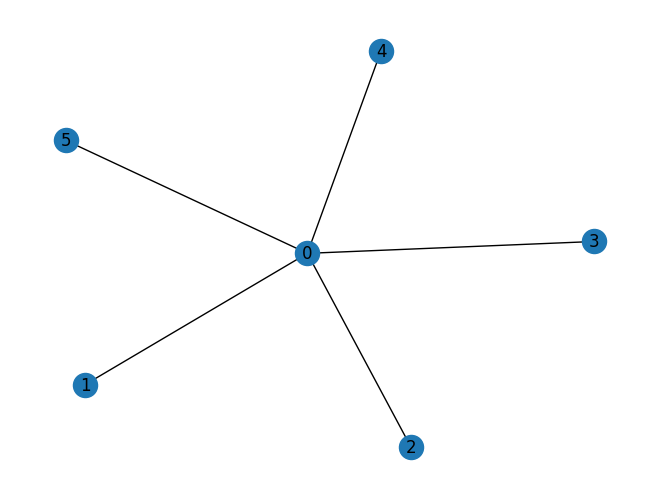

In [4]:
# Importación de Librerias
import networkx as nx
import dwave_networkx as dnx
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
from dimod.reference.samplers import ExactSolver

# Creación del Grafo de 5 nodos  -> incrementar a 100 y ver que pasa
s5 = nx.star_graph(5)
display(nx.draw(s5,with_labels=True))

# Resolución sobre qpu
t_init=time.time()
sampler = EmbeddingComposite(DWaveSampler())
print(dnx.min_vertex_cover(s5, sampler))
print('Qsolver time=',time.time()-t_init)

# Resolución sobre un Computador Clásico
t_init=time.time()
sampler = ExactSolver()
print(dnx.min_vertex_cover(s5, sampler))
print('Exactsolver time=',time.time()-t_init)


## Additional exercices

Check NetworkX libaries and try other [graph generators](https://networkx.org/documentation/stable/reference/generators.html), such as:

- the `nx.wheel_graph()` with a 5-node wheel graph
- the `nx.circular_ladder_graph()` with a 5-node ladder graph
- the `nx.complete_graph()` with a fully connected graph (clique)

Find the min vertex cover for these graphs with the exact solver and dwave QPU solver

Consider measuring CPU and QPU times and increasing the number of nodes




## Creamos otros grafos como se especifica en el enunciado

In [5]:
import matplotlib.pyplot as plt
import random

In [15]:
def ejercicio(grafo):
    """
    Esta función encuentra el mínimo recubrimiento de vértices de un grafo,
    comparando la eficiencia de un solucionador cuántico y un solucionador clásico.

    Args:
    grafo: Un objeto de grafo para el cual se busca el mínimo recubrimiento de vértices.

    La función realiza las siguientes operaciones:
    1. Utiliza un solucionador cuántico (QPU) para encontrar el mínimo recubrimiento de vértices.
    2. Utiliza un solucionador clásico (ExactSolver) para el mismo propósito.
    En ambos casos, mide y muestra el tiempo que tarda cada solución.
    """

    # Resolución sobre una Unidad de Procesamiento Cuántico (QPU)
    # Registra el tiempo inicial
    t_init = time.time()
    
    # Crea un sampler cuántico con DWaveSampler y EmbeddingComposite
    sampler = EmbeddingComposite(DWaveSampler())

    # Calcula el mínimo recubrimiento de vértices usando el sampler cuántico
    print(dnx.min_vertex_cover(grafo, sampler))

    # Muestra el tiempo que tardó la solución en el QPU
    print('Qsolver time =', time.time() - t_init)

    # Resolución sobre un Computador Clásico
    # Registra el tiempo inicial
    t_init = time.time()
    
    # Crea un sampler clásico usando ExactSolver
    sampler = ExactSolver()

    # Calcula el mínimo recubrimiento de vértices usando el método exacto clásico
    print(dnx.min_vertex_cover(grafo, sampler))

    # Muestra el tiempo que tardó la solución en el computador clásico
    print('Exactsolver time =', time.time() - t_init)

In [6]:
def random_color():
    # Generar un color aleatorio en formato hexadecimal
    return "#" + ''.join([random.choice('0123456789ABCDEF') for i in range(6)])

In [7]:
def visualizar_grafo(G, title):
    plt.figure()
    nx.draw(G, with_labels=True, node_color=random_color(), edge_color=random_color(), node_size=800)
    plt.title(title)
    plt.show()

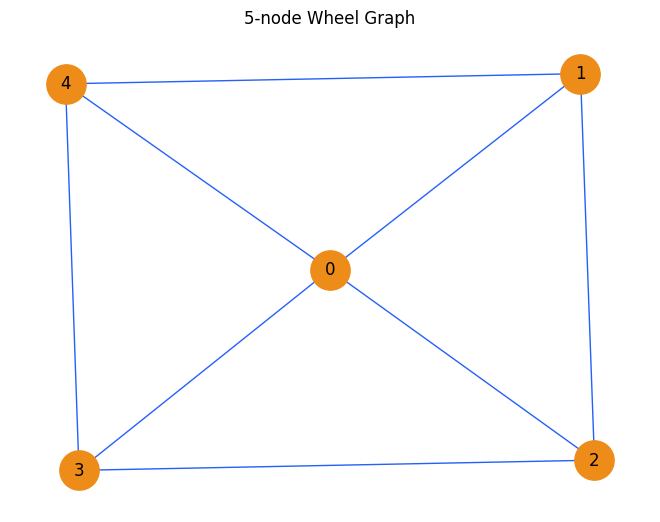

In [11]:
# Crear y visualizar un grafo de rueda de 5 nodos
grafo_rueda = nx.wheel_graph(5)
visualizar_grafo(grafo_rueda, '5-node Wheel Graph')

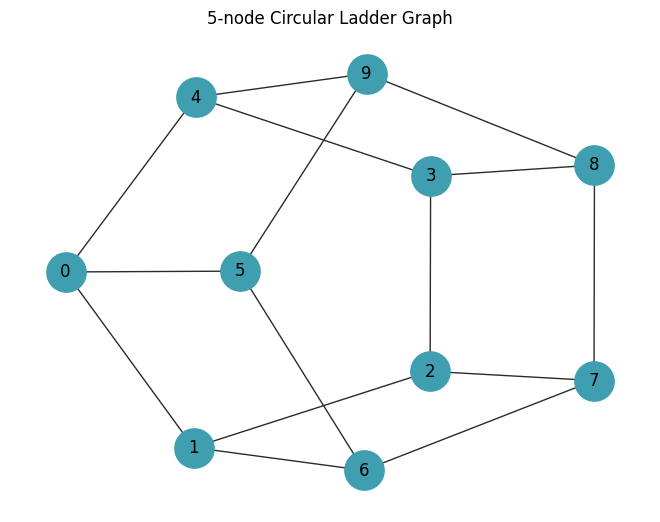

In [13]:
# Crear y visualizar un grafo de escalera circular de 5 nodos
grafo_eslera_circular = nx.circular_ladder_graph(5)
visualizar_grafo(grafo_eslera_circular, '5-node Circular Ladder Graph')

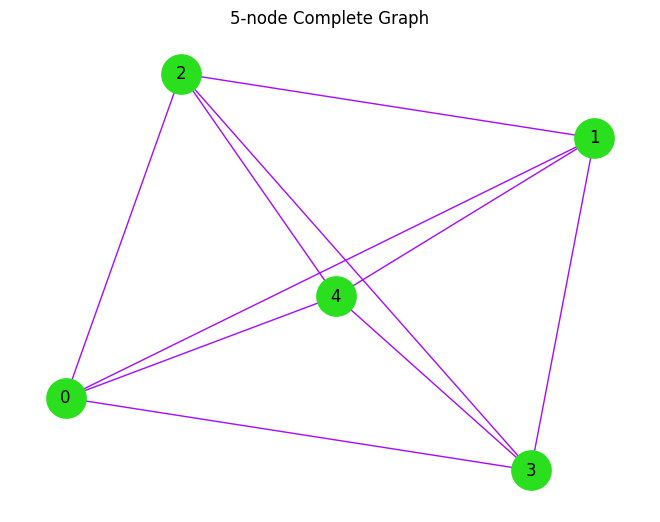

In [14]:
# Crear y visualizar un grafo completo (clique) de 5 nodos
grafo_completo = nx.complete_graph(5)
visualizar_grafo(grafo_completo, '5-node Complete Graph')

In [16]:
# Evaluar el grafo
print("Evaluando un Grafo de Rueda de 5 nodos")
ejercicio(grafo_rueda)

Evaluando un Grafo de Rueda de 5 nodos
[0, 1, 3]
Qsolver time = 5.9507129192352295
[0, 1, 3]
Exactsolver time = 0.00564885139465332


In [17]:
# Evaluar el grafo
print("Evaluando un Grafo de escalera circular de 5 nodos")
ejercicio(grafo_eslera_circular)

Evaluando un Grafo de escalera circular de 5 nodos
[1, 3, 4, 5, 7, 9]
Qsolver time = 5.5461106300354
[1, 3, 4, 5, 7, 8]
Exactsolver time = 0.011715173721313477


In [18]:
# Evaluar el grafo
print("Evaluando un Grafo completo de 5 nodos")
ejercicio(grafo_completo)

Evaluando un Grafo completo de 5 nodos
[1, 2, 3, 4]
Qsolver time = 5.00820255279541
[0, 1, 2, 4]
Exactsolver time = 0.005410432815551758


## Hacemos lo mismo para 25 nodos

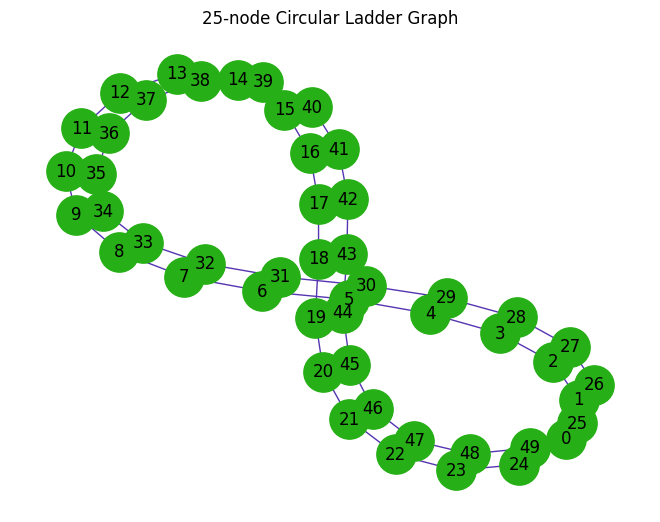

In [25]:
# Crear y visualizar un grafo de escalera circular de 5 nodos
grafo_eslera_circular = nx.circular_ladder_graph(25)
visualizar_grafo(grafo_eslera_circular, '25-node Circular Ladder Graph')

In [26]:
# Evaluar el grafo
print("Evaluando un Grafo de escalera circular de 25 nodos")
ejercicio(grafo_eslera_circular)

Evaluando un Grafo de escalera circular de 25 nodos
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 20, 22, 24, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 46, 48]
Qsolver time = 6.0714240074157715


MemoryError: Unable to allocate 50.0 PiB for an array with shape (1125899906842624, 50) and data type int8

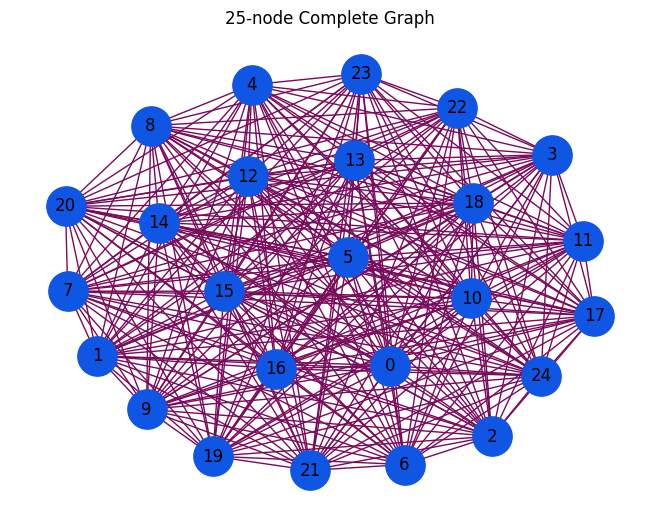

In [27]:
# Crear y visualizar un grafo completo (clique) de 5 nodos
grafo_completo = nx.complete_graph(25)
visualizar_grafo(grafo_completo, '25-node Complete Graph')

In [28]:
# Evaluar el grafo
print("Evaluando un Grafo completo de 25 nodos")
ejercicio(grafo_completo)

Evaluando un Grafo completo de 25 nodos
[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23]
Qsolver time = 8.821426630020142
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24]
Exactsolver time = 54.78307557106018


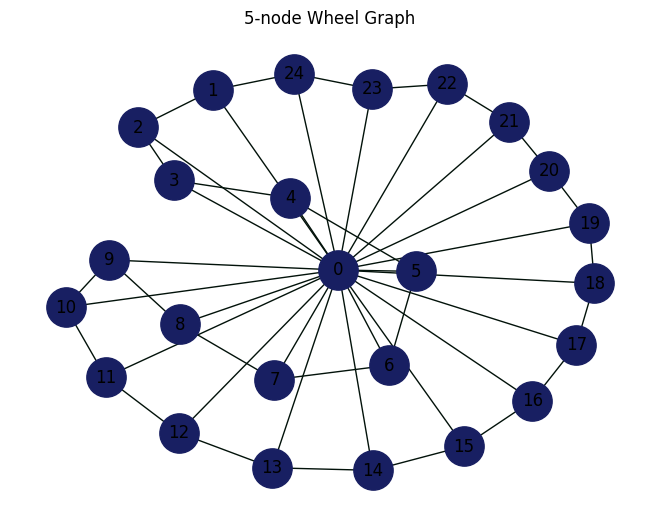

In [23]:
# Crear y visualizar un grafo de rueda de 25 nodos
grafo_rueda = nx.wheel_graph(25)
visualizar_grafo(grafo_rueda, '25-node Wheel Graph')

In [24]:
# Evaluar el grafo
print("Evaluando un Grafo de Rueda de 25 nodos")
ejercicio(grafo_rueda)

Evaluando un Grafo de Rueda de 50 nodos
[0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
Qsolver time = 5.791955947875977
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
Exactsolver time = 46.78386616706848


Build an arbitrary Graph with NetworkX yand find the **Minimum Vertex Cover**

In [29]:
def crear_y_visualizar_grafo(nodos, aristas):
    """
    Crea un grafo con los nodos y aristas proporcionados, lo visualiza y
    encuentra su mínimo recubrimiento de vértices.

    Args:
    nodos: una lista de nodos para añadir al grafo.
    aristas: una lista de tuplas donde cada tupla representa una arista entre dos nodos.
    """

    # Inicializar un grafo no dirigido
    G = nx.Graph()

    # Agregar nodos y aristas al grafo
    G.add_nodes_from(nodos)
    G.add_edges_from(aristas)

    #visualizar_grafo
    visualizar_grafo(G,"Grafo arbitrario")
    
    return G

In [30]:
def encontrar_min_vertex_cover(G):
    """
    Encuentra el mínimo recubrimiento de vértices para el grafo dado.

    Args:
    G: Un objeto de grafo de NetworkX.

    Returns:
    Un conjunto de nodos que conforma el mínimo recubrimiento de vértices del grafo G.
    """
    
    # Crear un solucionador exacto
    sampler = ExactSolver()

    # Calcular el mínimo recubrimiento de vértices usando el solucionador exacto
    min_vertex_cover = dnx.min_vertex_cover(G, sampler)

    return min_vertex_cover

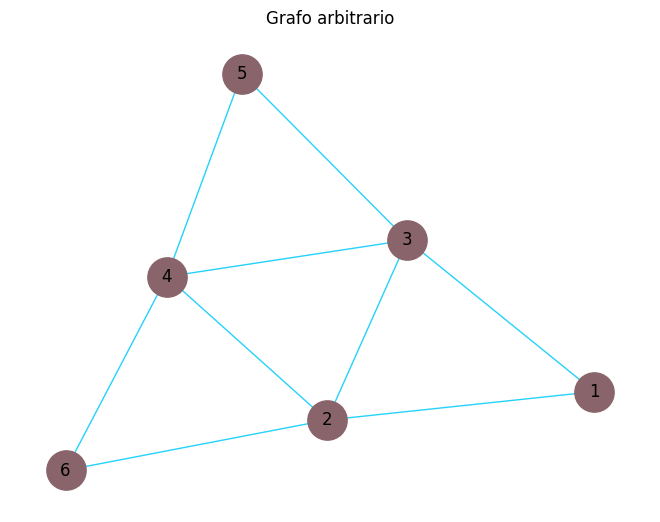

Mínimo recubrimiento de vértices: ['2', '3', '4']


In [32]:
# Definir nodos y aristas
nodos = ['1', '2', '3', '4', '5', '6']
aristas = [('1', '2'), ('1', '3'), ('2', '3'), ('2', '4'), ('2', '6'), ('3', '4'), ('3', '5'), ('4', '5'), ('4', '6')]
# Crear y visualizar el grafo
grafo = crear_y_visualizar_grafo(nodos, aristas)
# Encontrar y mostrar el mínimo recubrimiento de vértices
min_cover = encontrar_min_vertex_cover(grafo)
print("Mínimo recubrimiento de vértices:", min_cover)